# Práctica 2. Clustering de semillas

## 1. Visualización de datos con distintos scalers + PCA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline


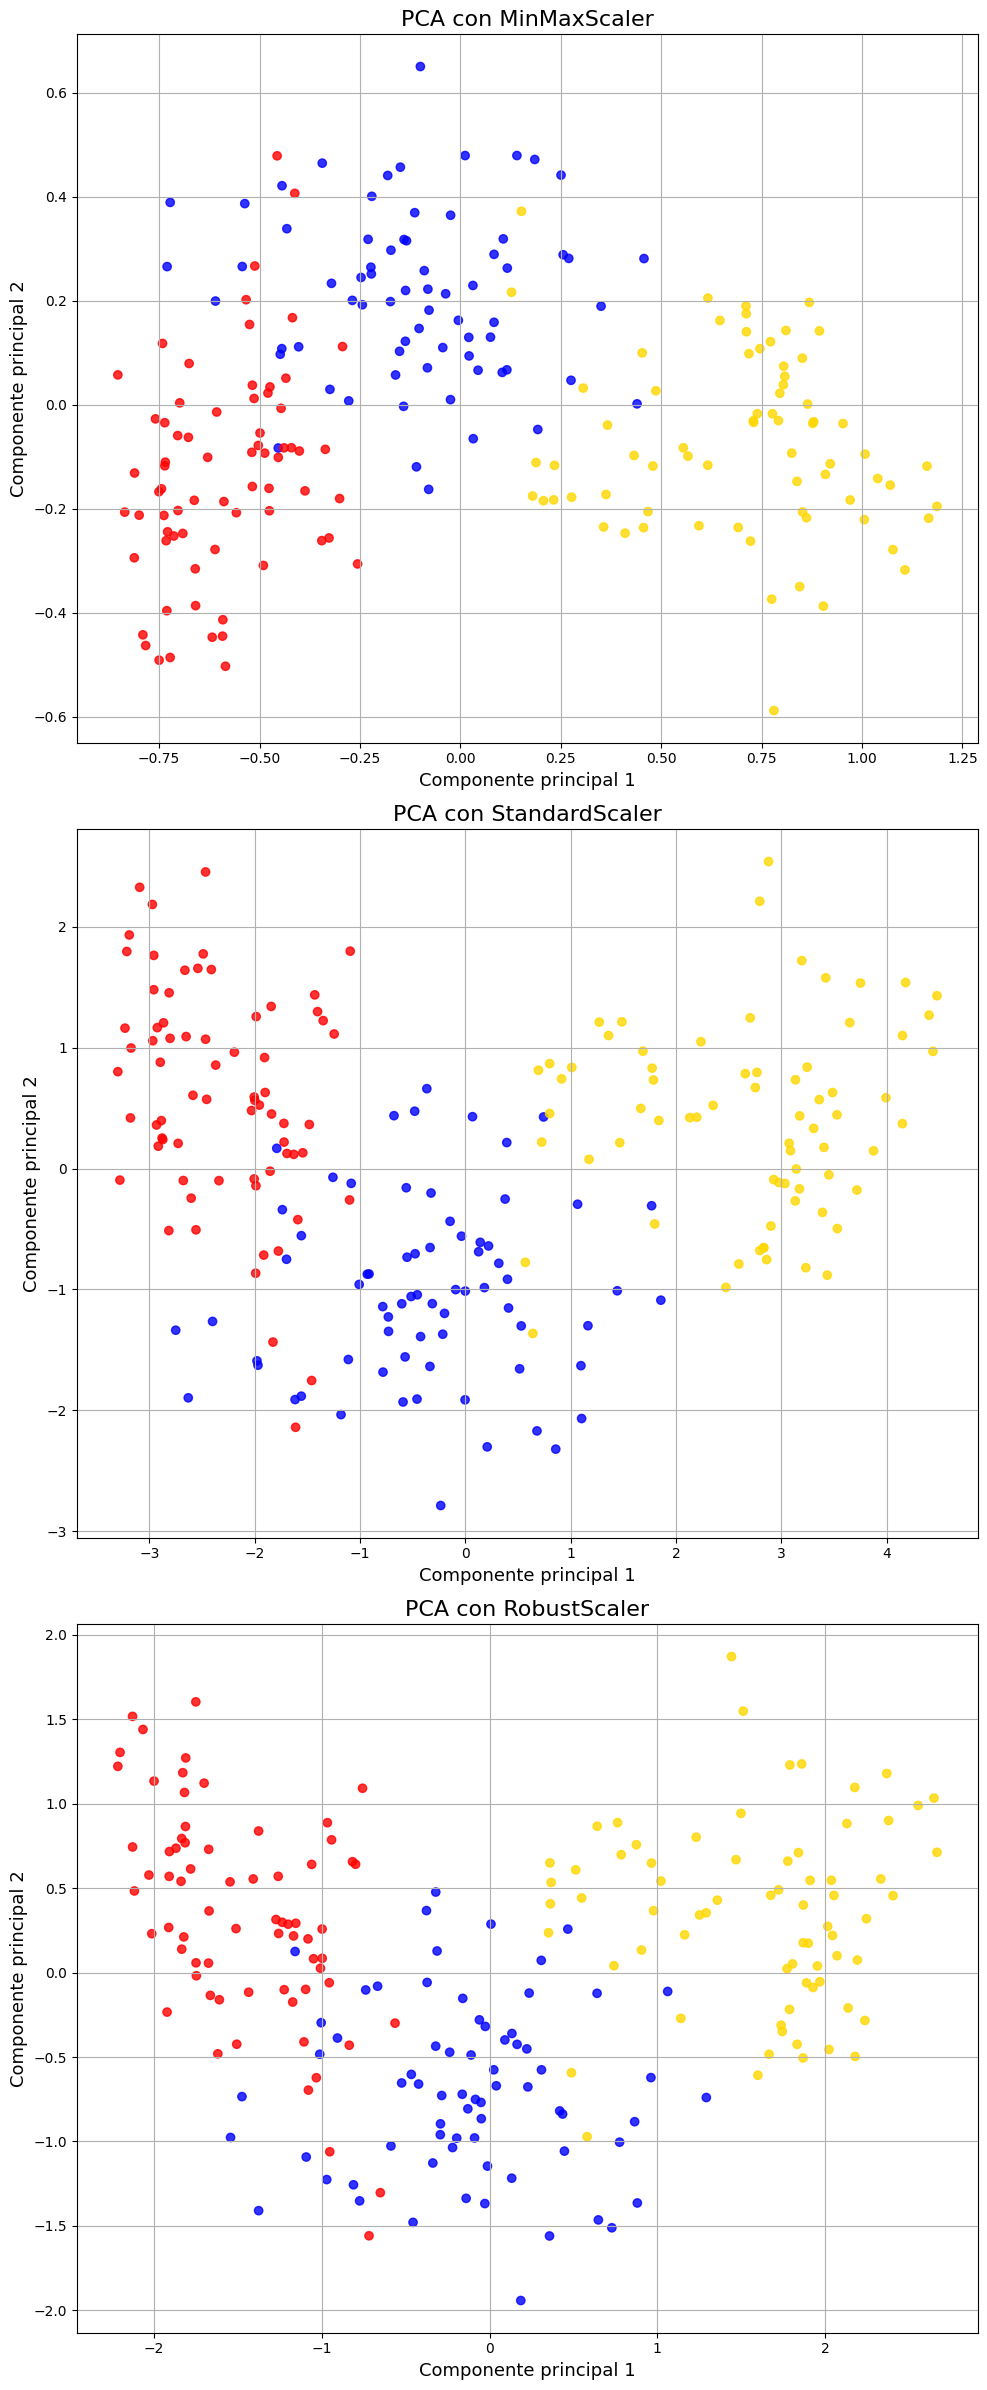

In [2]:
# Cargar datos
df = pd.read_csv("semillas.csv")
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Mapeo de colores personalizados por clase
color_map = {1: 'blue', 2: 'gold', 3: 'red'}
colors = y.map(color_map)

# Definir los escaladores
scalers = {
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler": StandardScaler(),
    "RobustScaler": RobustScaler()
}

# Crear figura para mostrar los 3 gráficos verticalmente
fig, axes = plt.subplots(3, 1, figsize=(10, 24))  # 10 de ancho, 24 de alto

for ax, (scaler_name, scaler) in zip(axes, scalers.items()):
    pipeline = Pipeline([
        ("scaler", scaler),
        ("pca", PCA(n_components=2))
    ])
    X_pca = pipeline.fit_transform(X)

    ax.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, alpha=0.8)
    ax.set_title(f"PCA con {scaler_name}", fontsize=16)
    ax.set_xlabel("Componente principal 1", fontsize=13)
    ax.set_ylabel("Componente principal 2", fontsize=13)
    ax.grid(True)

plt.tight_layout()
plt.show()

### Comparativa de escaladores tras PCA (con colores por clase)

Se ha aplicado PCA a los datos de semillas tras escalar con tres métodos distintos: **MinMaxScaler**, **StandardScaler** y **RobustScaler**. En cada caso se proyectan las instancias sobre los dos primeros componentes principales.

Los puntos están coloreados según la clase real de semilla:
- 🔵 Clase 1
- 🟡 Clase 2
- 🔴 Clase 3

#### Observaciones:
- **MinMaxScaler** ofrece una separación aceptable, especialmente entre las clases 2 (amarillo) y 3 (rojo), aunque con algo más de solapamiento en el centro.
- **StandardScaler** proporciona una separación **muy clara entre las tres clases**, con fronteras bastante definidas entre cada grupo. Las clases se distribuyen mejor en el plano de componentes.
- **RobustScaler** también consigue una separación razonable, aunque los grupos no se distinguen tanto como con StandardScaler. Aun así, es robusto ante valores extremos.

#### Conclusión:
**StandardScaler** es el método de escalado que mejor preserva la estructura de clases del conjunto de datos original, facilitando una posible tarea de clustering. Por ello, se utilizará como preprocesamiento base en los siguientes apartados.
